In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
from datetime import datetime,timezone
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
import statsmodels.api as sm


In [2]:
data=pd.read_csv("Good\P05-imu-right.csv",low_memory=False)
data

,timestamp,ax,ay,az,gx,gy,gz,Label
0,1638178847006,-6457,13890,-5232,-24,-44,21,1
1,1638178847015,-6462,13914,-5226,-22,-40,18,1
2,1638178847025,-6461,13920,-5228,-22,-34,11,1
3,1638178847034,-6443,13920,-5213,-21,-31,14,1
4,1638178847044,-6440,13934,-5203,-23,-26,17,1
...,...,...,...,...,...,...,...,...
211285,1638180875351,-2374,10985,-11691,-4,-25,18,6
211286,1638180875361,-2371,10992,-11681,-5,-26,19,6
211287,1638180875370,-2373,10995,-11685,-9,-26,19,6
211288,1638180875380,-2379,10982,-11680,-6,-23,18,6


In [3]:
selected_columns = ['ax', 'ay', 'az', 'gx', 'gy', 'gz']
X = data[selected_columns]
clf = IsolationForest(contamination=0.1)
clf.fit(X)
predictions = clf.predict(X)
data['anomaly'] = predictions
anomalies = data[data['anomaly'] == -1]
print(anomalies)

            timestamp    ax     ay     az    gx    gy    gz  Label  anomaly
61700   1638179439335 -1510  17710   2685 -1730 -4386   392      2       -1
61710   1638179439431  1389  16783   3505 -1548 -4421   937      2       -1
61711   1638179439441  1954  16497   3544 -1571 -4339  1098      2       -1
61712   1638179439450  2478  16332   3588 -1607 -4218  1202      2       -1
61713   1638179439460  2994  16378   3612 -1663 -4071  1266      2       -1
...               ...   ...    ...    ...   ...   ...   ...    ...      ...
199706  1638180764193 -2343  11331 -11496 -5827   525  2906      6       -1
199711  1638180764241 -2277  11358 -11364  4246  -824 -1991      6       -1
199712  1638180764250 -2468  10895 -11678  5143  -714 -2634      6       -1
199713  1638180764260 -2756  10580 -12143  5194  -723 -2640      6       -1
199714  1638180764270 -2968  10182 -12465  3957  -461 -2164      6       -1

[21129 rows x 9 columns]


In [4]:
data = data[data['anomaly'] == 1]
data

,timestamp,ax,ay,az,gx,gy,gz,Label,anomaly
0,1638178847006,-6457,13890,-5232,-24,-44,21,1,1
1,1638178847015,-6462,13914,-5226,-22,-40,18,1,1
2,1638178847025,-6461,13920,-5228,-22,-34,11,1,1
3,1638178847034,-6443,13920,-5213,-21,-31,14,1,1
4,1638178847044,-6440,13934,-5203,-23,-26,17,1,1
...,...,...,...,...,...,...,...,...,...
211285,1638180875351,-2374,10985,-11691,-4,-25,18,6,1
211286,1638180875361,-2371,10992,-11681,-5,-26,19,6,1
211287,1638180875370,-2373,10995,-11685,-9,-26,19,6,1
211288,1638180875380,-2379,10982,-11680,-6,-23,18,6,1


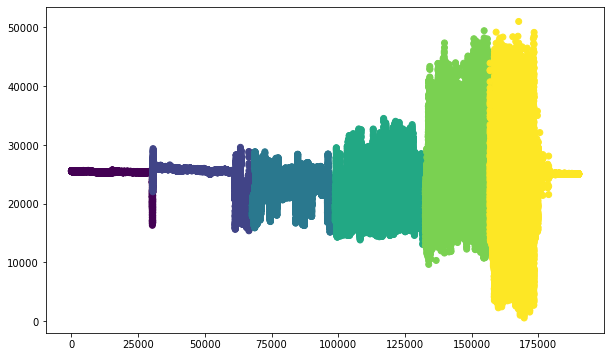

In [5]:
x_axis=np.arange(1,len(data)+1)
y_axis=abs(data['ax'].values[:])+abs(data['az'].values[:])+abs(data['ay'].values[:])
plt.figure(figsize=(10, 6))
plt.scatter(x_axis,y_axis,c=data['Label'],cmap='viridis')
plt.show()


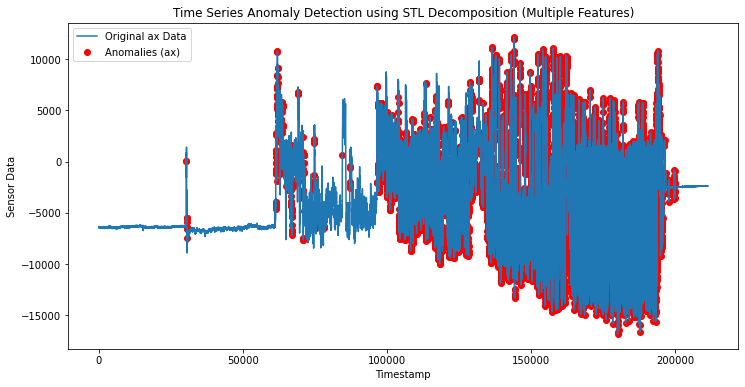

Detected Anomalies:
Feature: ax
            timestamp    ax     ay     az    gx    gy    gz  Label  anomaly
30401   1638179138855    13  16475   1289  1610   845  -934      1        1
30402   1638179138865    63  16030   1097  1738   839  -876      1        1
30500   1638179139806 -5912  14333  -5677    53  -288   492      1        1
30592   1638179140689 -6442  14570  -7709  1914   346   186      2        1
30593   1638179140698 -6538  14796  -8044  1888   337   140      2        1
...               ...   ...    ...    ...   ...   ...   ...    ...      ...
200021  1638180767217 -2138  11122 -11854 -1468   -49  1473      6        1
200022  1638180767226 -2944  11364 -12094 -1816   -14  1223      6        1
200024  1638180767246 -3502  11222 -10938  -661   254 -1007      6        1
200025  1638180767255  -916   9897 -10741  -394  2183 -1805      6        1
200027  1638180767274 -2828  13046 -12236  1660  -602  -413      6        1

[27251 rows x 9 columns]


In [6]:

# features = ['ax', 'ay', 'az', 'gx', 'gy', 'gz']
features=['ax']

# Define a threshold for anomaly detection (adjust as needed)
threshold = 300# You can choose a different threshold depending on your data

# Perform STL decomposition and detect anomalies for each feature
anomalies = {}
for feature in features:
    stl = sm.tsa.seasonal_decompose(data[feature], period=10)  # Adjust 'period' as needed
    residual = stl.resid
    feature_anomalies = data[abs(residual) > threshold]
    anomalies[feature] = feature_anomalies

# Plot the original sensor data and anomalies for each feature
plt.figure(figsize=(12, 6))
for feature in features:
    plt.plot(data.index, data[feature], label=f'Original {feature} Data')
    plt.scatter(anomalies[feature].index, anomalies[feature][feature], color='red', label=f'Anomalies ({feature})')

plt.title('Time Series Anomaly Detection using STL Decomposition (Multiple Features)')
plt.legend()
plt.xlabel('Timestamp')
plt.ylabel('Sensor Data')
plt.show()

# Print the detected anomalies for each feature
print("Detected Anomalies:")
for feature, anomaly_df in anomalies.items():
    print(f"Feature: {feature}")
    print(anomaly_df)


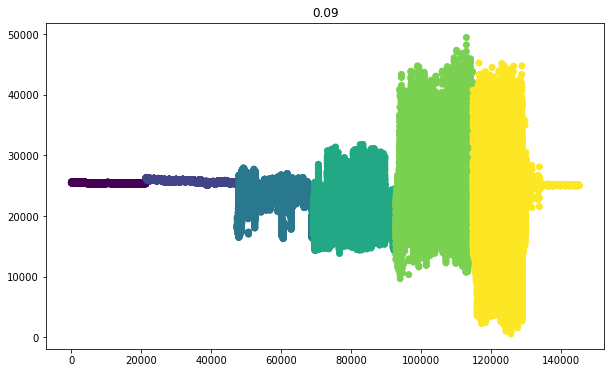

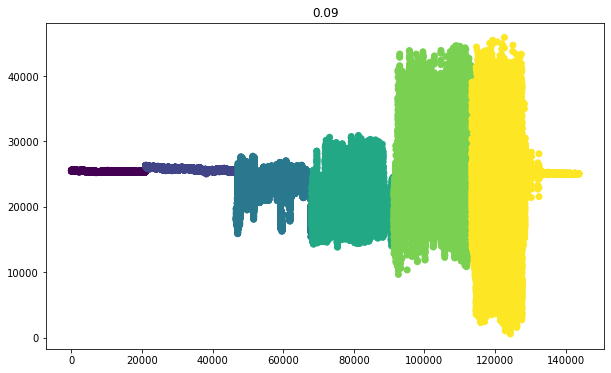

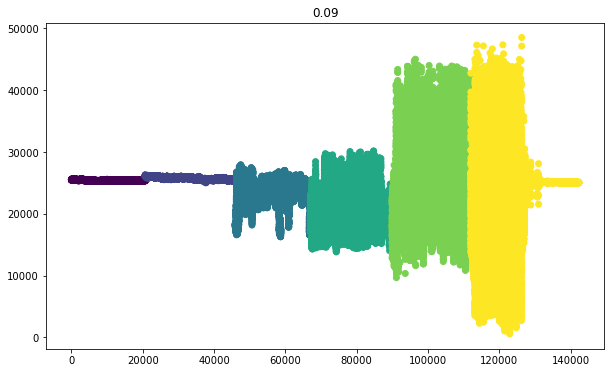

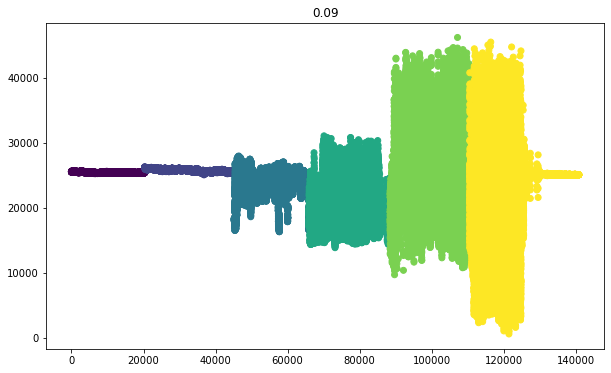

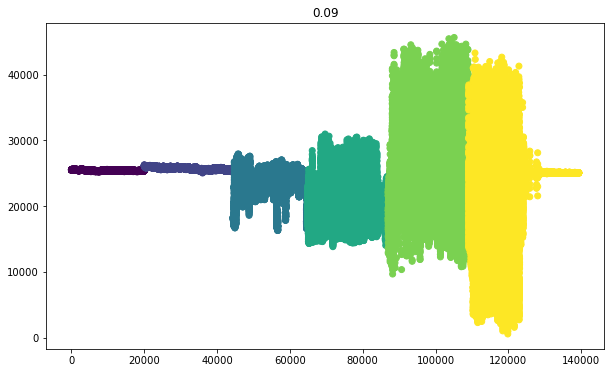

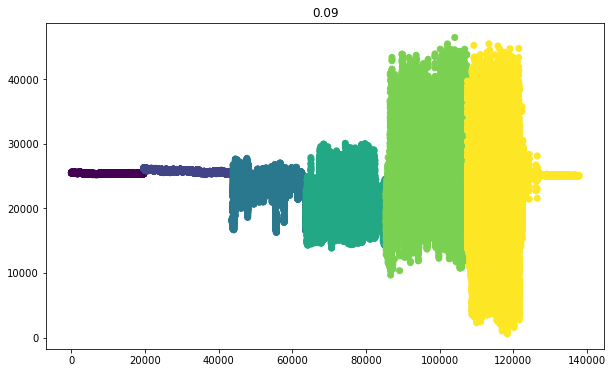

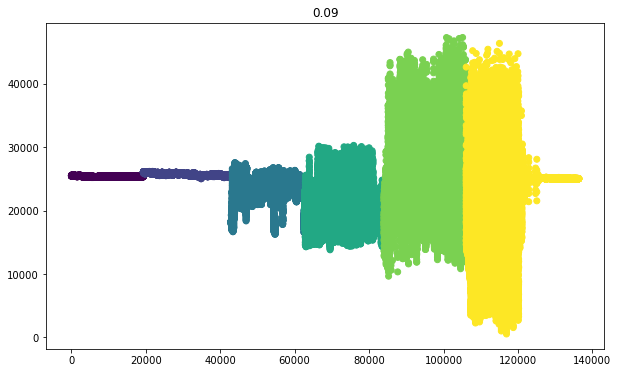

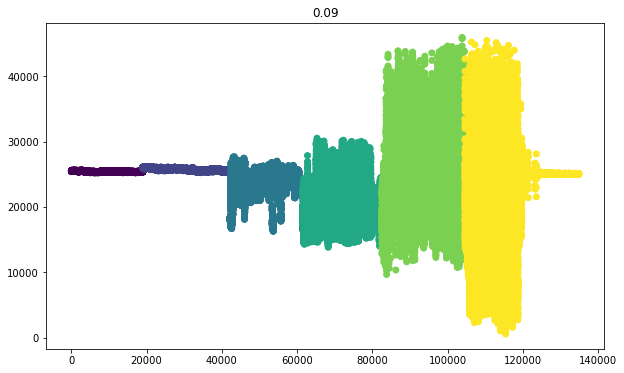

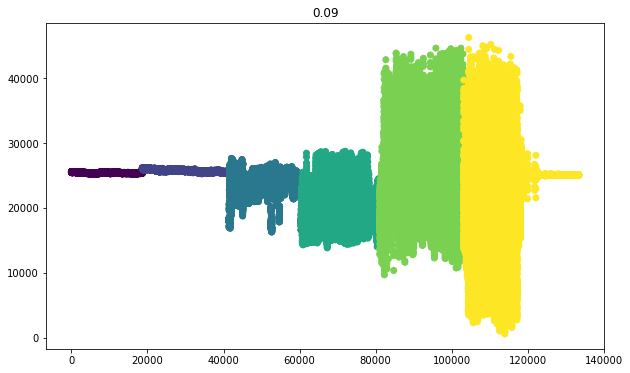

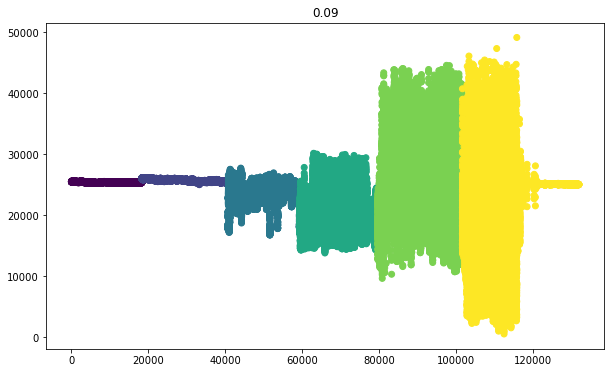

In [7]:
co=np.linspace(0.3,0.4,10)
for k in co:
    unique_labels = data['Label'].unique()
    cleaned_data = pd.DataFrame(columns=data.columns)
    for label in unique_labels:
        # Create a subset of data for the current label
        subset = data[data['Label'] == label]
        if(label==6):
            k=0.09
        elif label==5:
            k=0.09
        # Apply Isolation Forest to the subset
        isolation_forest = IsolationForest(n_estimators=100,contamination=k)  # Adjust the contamination parameter
        outlier_scores = isolation_forest.fit_predict(subset[['ax', 'ay', 'az', 'gx', 'gy', 'gz']])

        # Filter out anomalies (data points with a score of -1)
        non_anomalous_subset = subset[outlier_scores == 1]

        # Append the non-anomalous subset to the cleaned_data DataFrame
        cleaned_data = pd.concat([cleaned_data, non_anomalous_subset])
    x_axis=np.arange(1,len(cleaned_data)+1)
    y_axis=abs(cleaned_data['ax'].values[:])+abs(cleaned_data['az'].values[:])+abs(cleaned_data['ay'].values[:])
    plt.figure(figsize=(10, 6))
    plt.scatter(x_axis,y_axis,c=cleaned_data['Label'],cmap='viridis')
    plt.title(k)
    plt.show()

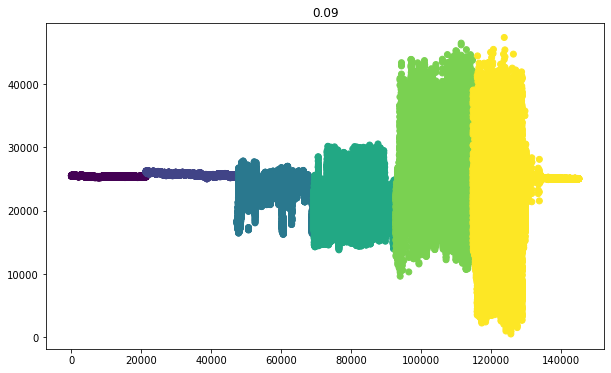

In [8]:
co=np.linspace(0.3,0.4,1)
for k in co:
    unique_labels = data['Label'].unique()
    cleaned_data = pd.DataFrame(columns=data.columns)
    for label in unique_labels:
        # Create a subset of data for the current label
        subset = data[data['Label'] == label]
        if(label==6):
            k=0.09
        elif label==5:
            k=0.09
        # Apply Isolation Forest to the subset
        isolation_forest = IsolationForest(n_estimators=100,contamination=k)  # Adjust the contamination parameter
        outlier_scores = isolation_forest.fit_predict(subset[['ax', 'ay', 'az', 'gx', 'gy', 'gz']])

        # Filter out anomalies (data points with a score of -1)
        non_anomalous_subset = subset[outlier_scores == 1]

        # Append the non-anomalous subset to the cleaned_data DataFrame
        cleaned_data = pd.concat([cleaned_data, non_anomalous_subset])
    x_axis=np.arange(1,len(cleaned_data)+1)
    y_axis=abs(cleaned_data['ax'].values[:])+abs(cleaned_data['az'].values[:])+abs(cleaned_data['ay'].values[:])
    plt.figure(figsize=(10, 6))
    plt.scatter(x_axis,y_axis,c=cleaned_data['Label'],cmap='viridis')
    plt.title(k)
    plt.show()

In [9]:
cleaned_data.to_csv('forest\P13-imu-right.csv',index=False)

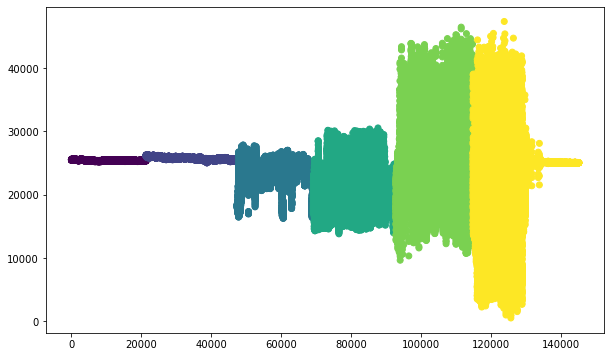

In [10]:
x_axis=np.arange(1,len(cleaned_data)+1)
y_axis=abs(cleaned_data['ax'].values[:])+abs(cleaned_data['az'].values[:])+abs(cleaned_data['ay'].values[:])
plt.figure(figsize=(10, 6))
plt.scatter(x_axis,y_axis,c=cleaned_data['Label'],cmap='viridis')
plt.show()

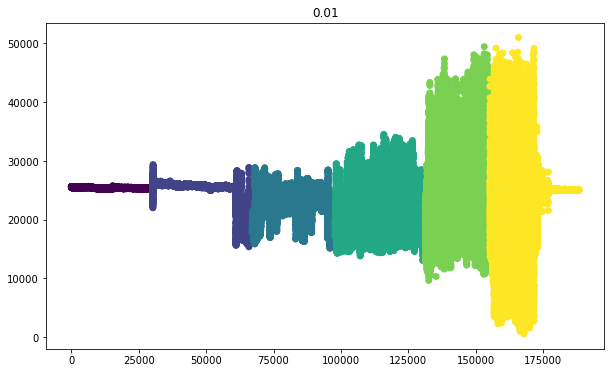

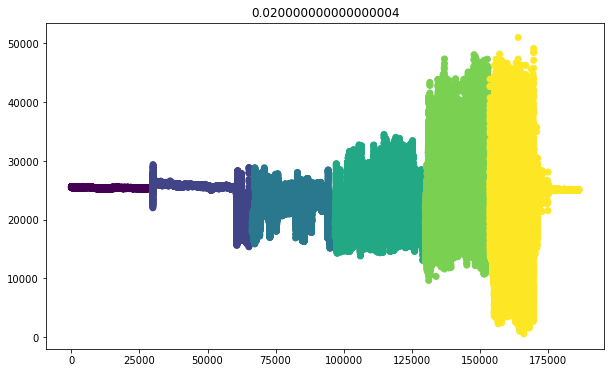

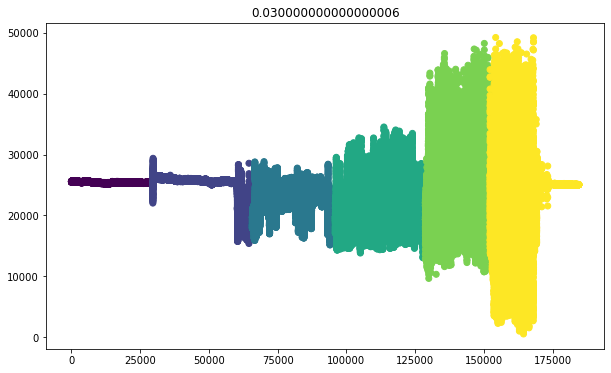

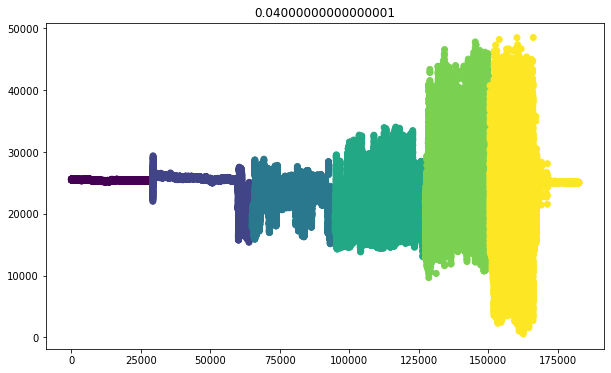

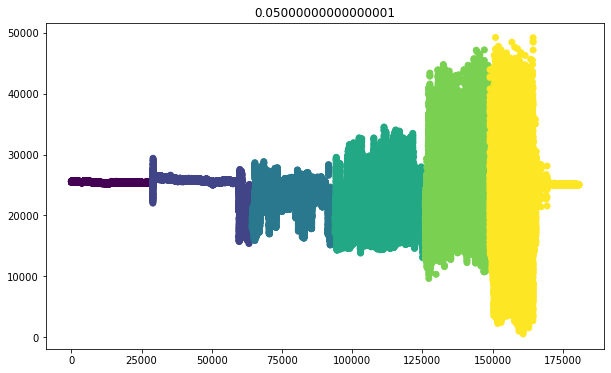

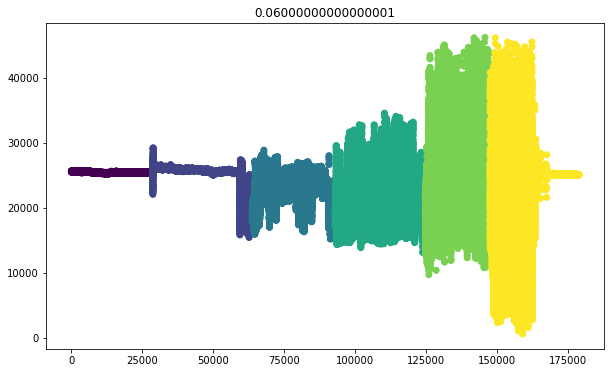

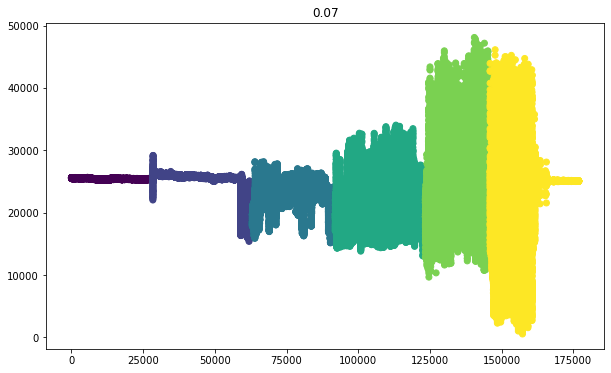

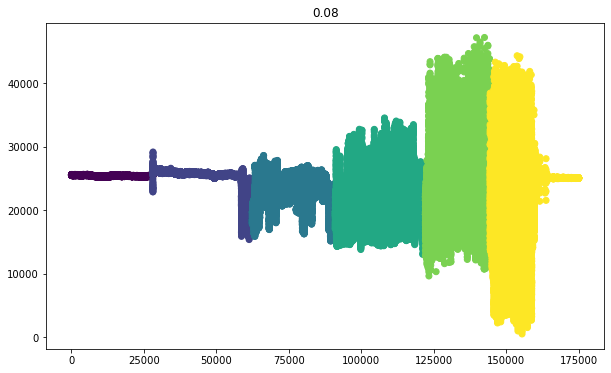

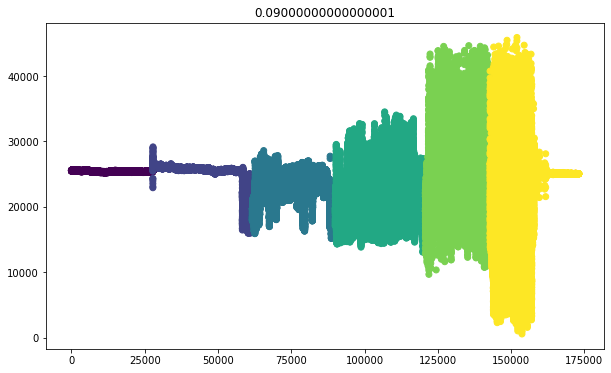

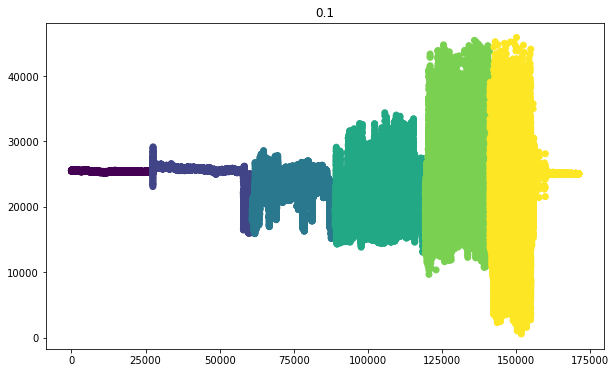

In [11]:
co=np.linspace(0.01,0.1,10)
for k in co:
    unique_labels = data['Label'].unique()
    cleaned_data = pd.DataFrame(columns=data.columns)
    for label in unique_labels:
        # Create a subset of data for the current label
        subset = data[data['Label'] == label]
        # if(label==6):
        #     k=0.09
        # elif label==5:
        #     k=0.09
        # Apply Isolation Forest to the subset
        isolation_forest = IsolationForest(n_estimators=100,contamination=k)  # Adjust the contamination parameter
        outlier_scores = isolation_forest.fit_predict(subset[['ax', 'ay', 'az', 'gx', 'gy', 'gz']])

        # Filter out anomalies (data points with a score of -1)
        non_anomalous_subset = subset[outlier_scores == 1]

        # Append the non-anomalous subset to the cleaned_data DataFrame
        cleaned_data = pd.concat([cleaned_data, non_anomalous_subset])
    x_axis=np.arange(1,len(cleaned_data)+1)
    y_axis=abs(cleaned_data['ax'].values[:])+abs(cleaned_data['az'].values[:])+abs(cleaned_data['ay'].values[:])
    plt.figure(figsize=(10, 6))
    plt.scatter(x_axis,y_axis,c=cleaned_data['Label'],cmap='viridis')
    plt.title(k)
    plt.show()

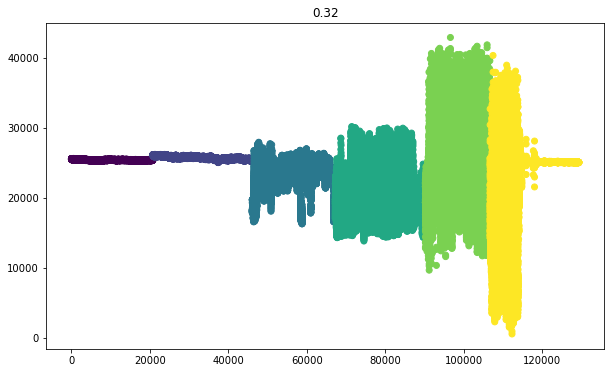

In [12]:
co=np.linspace(0.32,0.4,1)
for k in co:
    unique_labels = data['Label'].unique()
    cleaned_data = pd.DataFrame(columns=data.columns)
    for label in unique_labels:
        # Create a subset of data for the current label
        subset = data[data['Label'] == label]
        # if(label==6):
        #     k=0.09
        # elif label==5:
        #     k=0.09
        # Apply Isolation Forest to the subset
        isolation_forest = IsolationForest(n_estimators=100,contamination=k)  # Adjust the contamination parameter
        outlier_scores = isolation_forest.fit_predict(subset[['ax', 'ay', 'az', 'gx', 'gy', 'gz']])

        # Filter out anomalies (data points with a score of -1)
        non_anomalous_subset = subset[outlier_scores == 1]

        # Append the non-anomalous subset to the cleaned_data DataFrame
        cleaned_data = pd.concat([cleaned_data, non_anomalous_subset])
    x_axis=np.arange(1,len(cleaned_data)+1)
    y_axis=abs(cleaned_data['ax'].values[:])+abs(cleaned_data['az'].values[:])+abs(cleaned_data['ay'].values[:])
    plt.figure(figsize=(10, 6))
    plt.scatter(x_axis,y_axis,c=cleaned_data['Label'],cmap='viridis')
    plt.title(k)
    plt.show()

In [13]:
cleaned_data.to_csv('forest\P05-imu-right.csv',index=False)

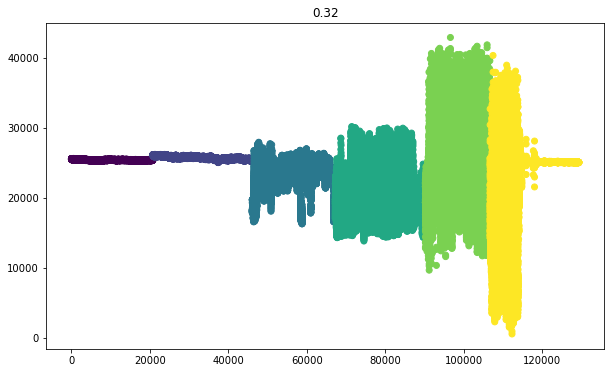

In [14]:
x_axis=np.arange(1,len(cleaned_data)+1)
y_axis=abs(cleaned_data['ax'].values[:])+abs(cleaned_data['az'].values[:])+abs(cleaned_data['ay'].values[:])
plt.figure(figsize=(10, 6))
plt.scatter(x_axis,y_axis,c=cleaned_data['Label'],cmap='viridis')
plt.title(k)
plt.show()